In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [53]:
df = pd.read_csv('new_output1.csv')
df.head()

,Input Sizes,Key Comparison,Time Taken(ms)
0,1000,9049,370.0
1,2000,20208,704.0
2,3000,31991,1173.0
3,4000,44567,1587.0
4,5000,58472,1944.0


In [54]:
x = df['Input Sizes']
y = df['Key Comparison']

In [55]:
n_values = x.unique()
theoretical_values = n_values * np.log2(n_values / 10) + n_values * 10
# theoretical_values = n_values * np.log2(n_values)


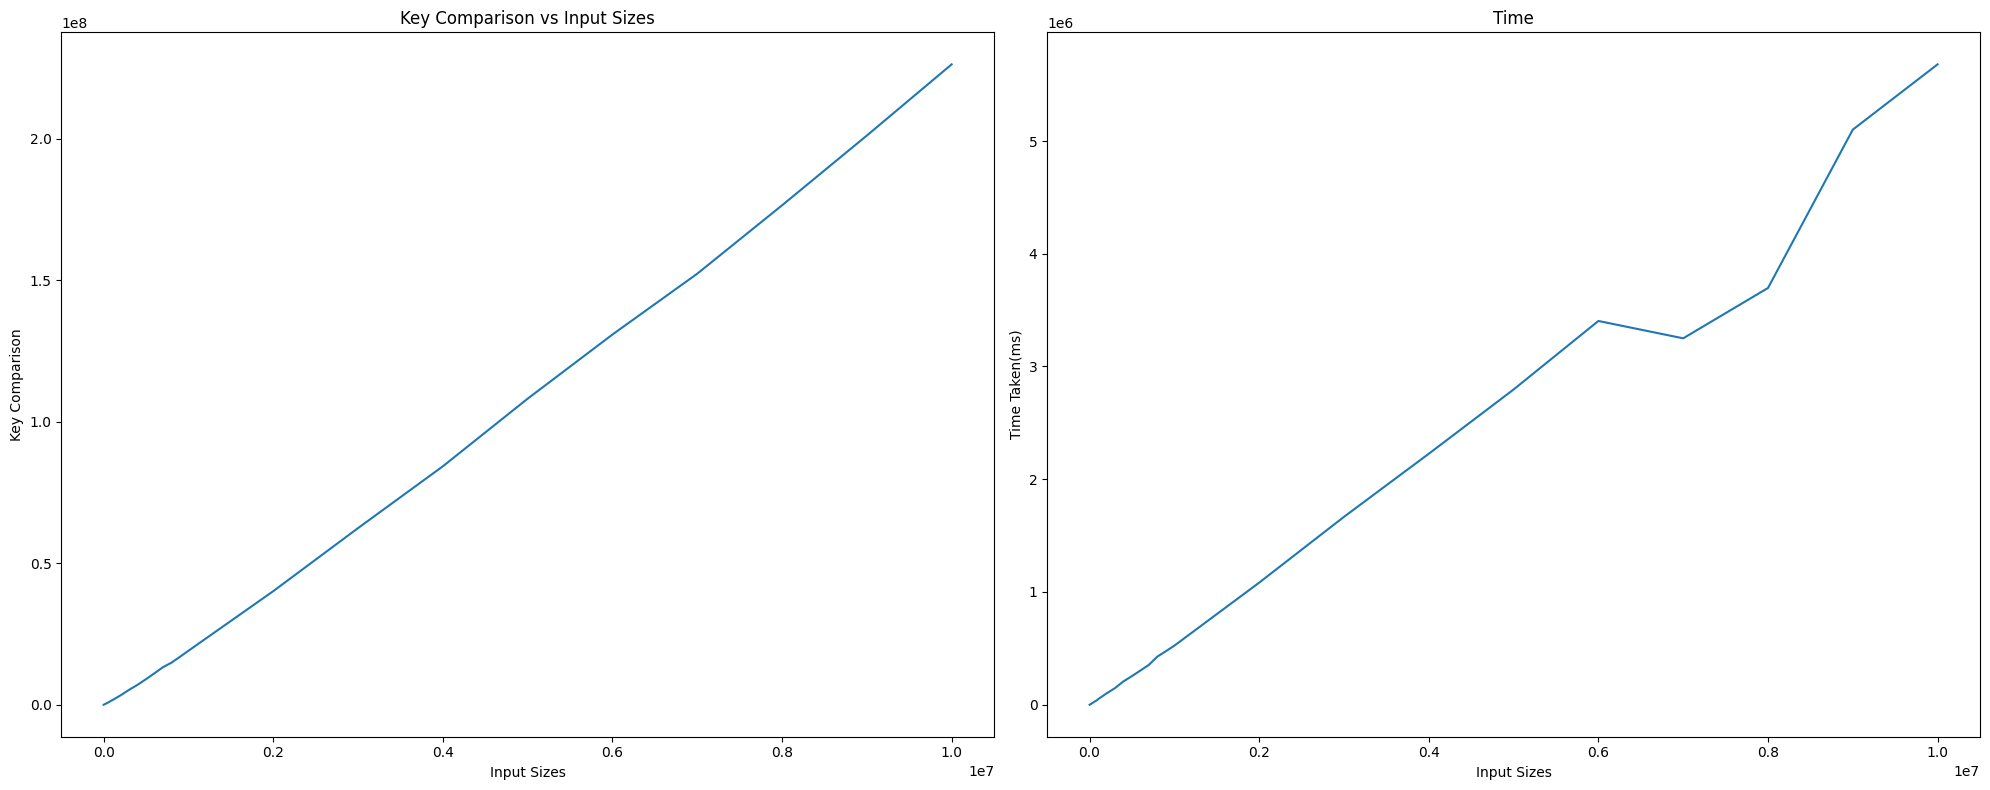

In [56]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sb.lineplot(y=y, x=x, ax=ax[0])
ax[0].set_title("Key Comparison vs Input Sizes")  # set title for first subplot

# line plot for time
sb.lineplot(
    y=df['Time Taken(ms)'],
    x=x,
    ax=ax[1],  # use the second subplot
)
ax[1].set_title("Time")  # set title for second subplot

# tight layout to prevent overlapping
plt.tight_layout()

plt.show()

In [57]:
def theoretical(n, S):
    return n * np.log2(n / S) + S * n

In [58]:
df2 = pd.read_csv("new_output2.csv")

/tmp/ipykernel_743137/2343920391.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend()


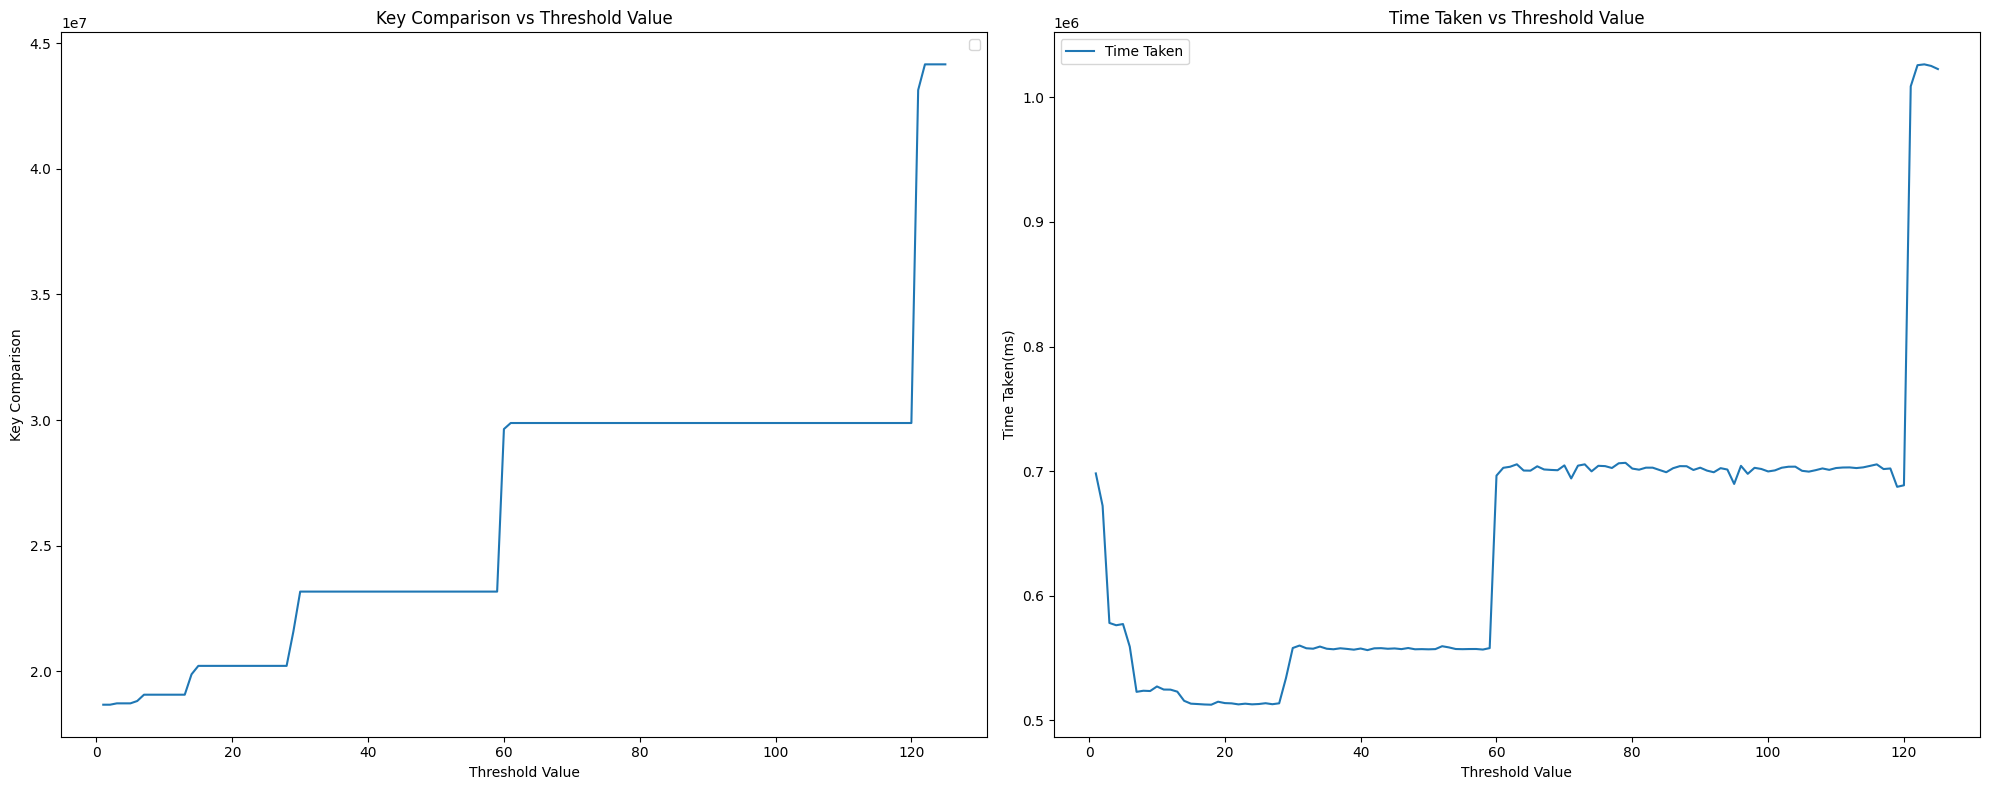

In [59]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Line plot for key comparison
lineKey = sb.lineplot(data=df2, y="Key Comparison", x="Threshold Value", ax=ax[0])
x = df2["Threshold Value"]
y = theoretical(1000000, x)
# sb.lineplot(x=x, y=y, ax=ax[0], color="red", label='Theoretical')
ax[0].legend()
ax[0].set_title("Key Comparison vs Threshold Value")

# Line plot for time
lineTime = sb.lineplot(data=df2, y="Time Taken(ms)", x="Threshold Value", ax=ax[1], label='Time Taken')
ax[1].set_title("Time Taken vs Threshold Value")

# Layout so plots do not overlap
plt.tight_layout()

# Show the plot
plt.show()


In [60]:
    # Optimal Threshold S is determined as the largest value of S where the number of key comparisons in Insertion is less than Merge

In [61]:
data_original = pd.read_csv("time_merge.csv")
data_hybrid = pd.read_csv("time_hybrid.csv")

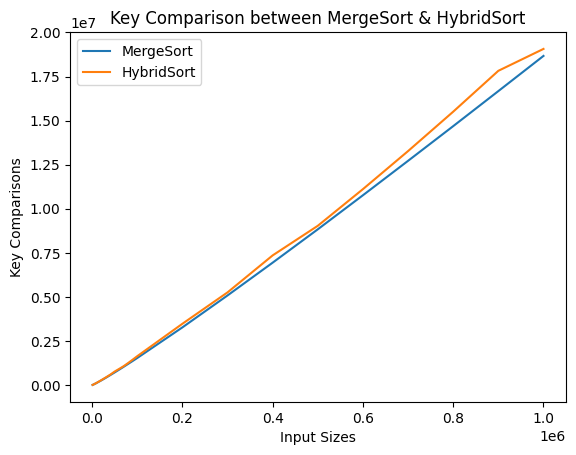

In [62]:
# Create plot
plt.plot(data_original['Input Sizes'], data_original['Key Comparison'], label='MergeSort')
plt.plot(data_original['Input Sizes'], data_hybrid['Key Comparison'], label='HybridSort')

# Add title and labels
plt.title('Key Comparison between MergeSort & HybridSort')
plt.xlabel('Input Sizes')
plt.ylabel('Key Comparisons')

# Legend
plt.legend()

# Display plot
plt.show()

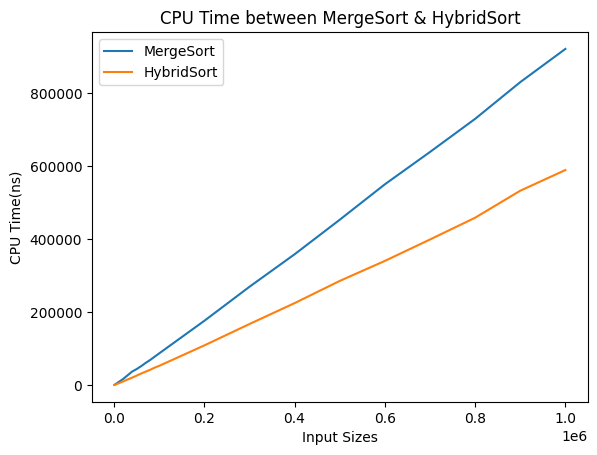

In [63]:
# Create plot
plt.plot(data_original['Input Sizes'], data_original['Time Taken(ms)'], label='MergeSort')
plt.plot(data_original['Input Sizes'], data_hybrid['Time Taken(ms)'], label='HybridSort')

# Add title and labels
plt.title('CPU Time between MergeSort & HybridSort')
plt.xlabel('Input Sizes')
plt.ylabel('CPU Time(ns)')

# Legend
plt.legend()

# Display plot
plt.show()

AttributeError: 'Figure' object has no attribute 'xaxis'

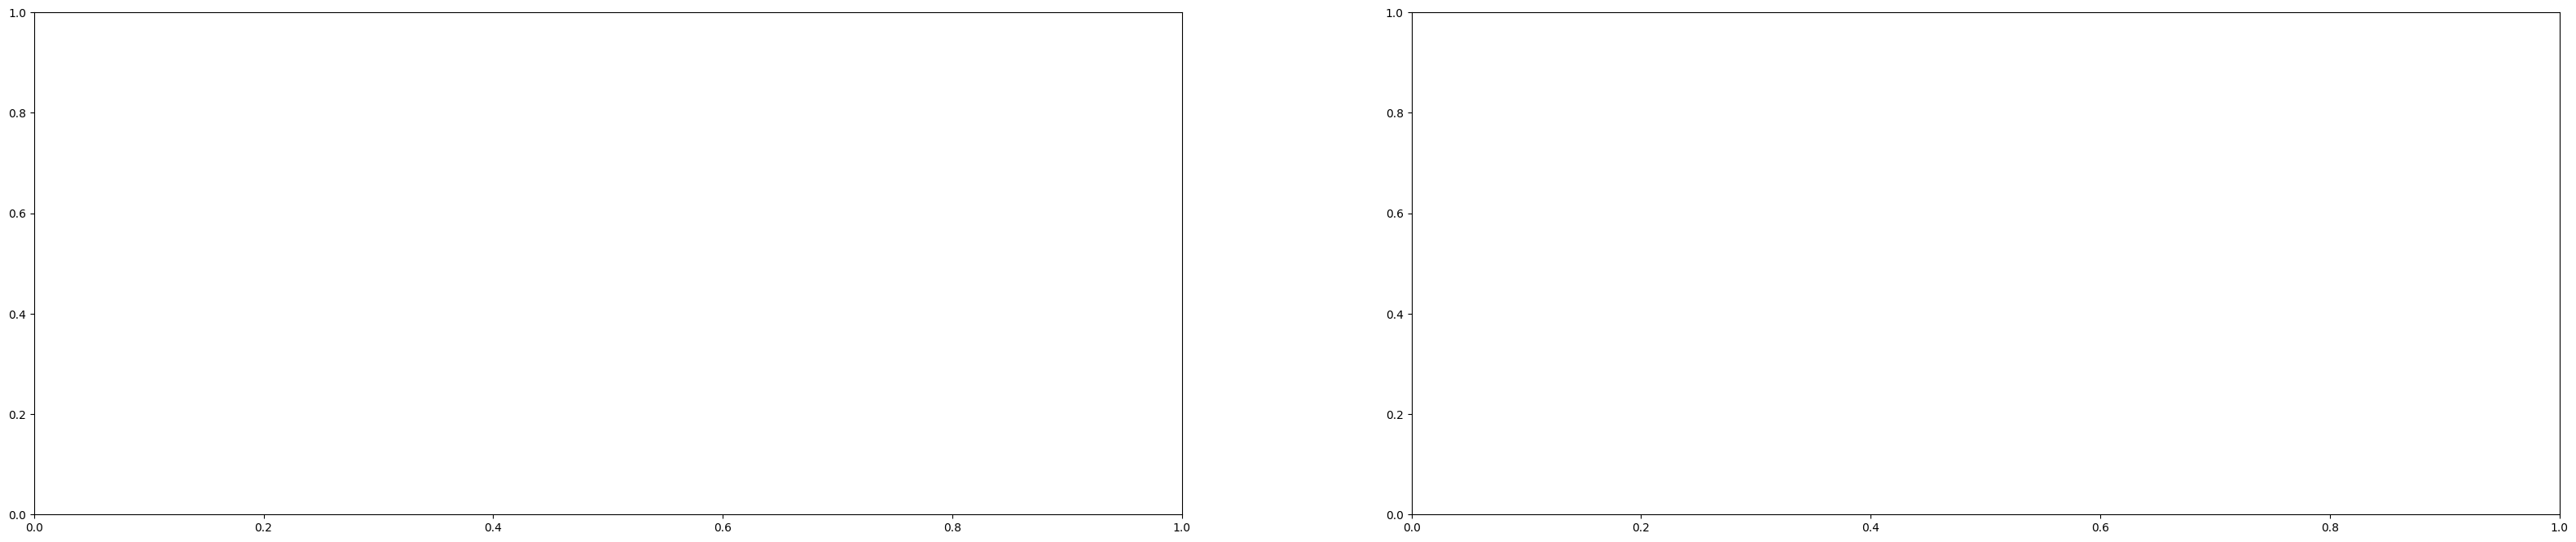

In [64]:
ax = plt.subplots(1, 2, figsize=(40, 8))
sb.lineplot(y=data_hybrid['Key Comparison'], x=data_hybrid['Input Sizes'], ax=ax[0], label="HybridSort")
ax[0].set_title("Key Comparison Between MergeSort & HybridSort")  # set title for first subplot

# Plot the theoretical analysis curve
ax[0].plot(
    data_original['Input Sizes'], data_original['Key Comparison'], label="MergeSort", linestyle="--", color="red"
)
ax[0].legend()  # Add a legend to the plot

# line plot for time
sb.lineplot(
    y=df['Time Taken(ms)'],
    x=x,
    ax=ax[1],  # use the second subplot
    label="Emphirical",
)
ax[1].set_title("Time")  # set title for second subplot

# Set x-axis limits to show from 0 to 50,000,000
x_min = 0
x_max = 11_000_000  # Use underscores for readability

ax[0].set_xlim(x_min, x_max)
ax[1].set_xlim(x_min, x_max)

# tight layout to prevent overlapping
plt.tight_layout()

plt.show()